<a href="https://colab.research.google.com/github/Hamza-t/7-Days-of-Exploratory-Data-Analysis/blob/main/Superstore_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sample Superstore Report 

## Context

###This is a sample superstore dataset, a kind of a simulation where you perform extensive data analysis to deliver insights on how the company can increase its profits while minimizing the losses.
###We will to find out the weak areas where you can work to make more profit. 
###Try to extract all business problems you can derive by exploring the data

##Data


Ship Mode :
Mode of shipping used for shipment delivery

Segment : 
(Categorical) Customer segment product was shipped to

Country : 
Country in which the shipment was delivered

City : 
City in which shipment was delivered

State : 
State in which the shipment was delivered

Postal Code : 
Postal code the shipment was delivered to

Region : 
Country region

Category : 
The category product belongs to

Sub-Category : 
Sub-category of the product

Sales : 
Sale made in USD

Quantity : 
Product quantity

Discount : 
Discount given on the product

Profit : 
Profit/loss made on the sale

## Importing Liabraries

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import os
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

import opendatasets as od

import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots
%matplotlib inline 
sns.set(color_codes=True)

In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


##Data Preparation

In [ ]:
#Load the file from kaggle 
#Connect with Kagle !
path="https://www.kaggle.com/bravehart101/sample-supermarket-dataset"
od.download(path)

Skipping, found downloaded files in "./sample-supermarket-dataset" (use force=True to force download)


In [ ]:
path_c= "./sample-supermarket-dataset"
os.listdir(path_c)

['SampleSuperstore.csv']

In [ ]:
# Read the files  # ['SampleSuperstore.csv']
data=pd.read_csv("./sample-supermarket-dataset/SampleSuperstore.csv")  

In [ ]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
#data size 
print(f"The size of data is {data.shape}")

The size of data is (9994, 13)


In [ ]:
#Type of data 
print(f"The type of columns in data\n{data.dtypes}")

The type of columns in data
Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object


##data preprocessing

In [ ]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
#duplicate rows 
duplicate_rows_data = data[data.duplicated()]
duplicate_rows_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780


In [ ]:
# we will not remove the duplicate rows , 


In [ ]:
#remove the country column 
data.drop(["Country","Postal Code"], axis=1, inplace=True)

In [ ]:
data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
data.isnull().sum(axis = 0).to_frame()

,0
index,0
Ship Mode,0
Segment,0
City,0
State,0
Region,0
Category,0
Sub-Category,0
Sales,0
Quantity,0


In [ ]:
# Some statistic 
data.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


##Data analysis


In [ ]:
#lets take a look 
data["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [ ]:
data["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [ ]:
data["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [ ]:
data["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [ ]:
#create a column to identify the problem of negatif profit 
data['Profit_state'] = data['Profit'] > 0 

In [ ]:
data = data.reset_index()

###Profit by Ship mode

In [ ]:
data_ship_mode = data.groupby(["Ship Mode", "Profit_state"]).count()['index'].reset_index(name='count')

In [ ]:
data_ship_mode

,Ship Mode,Profit_state,count
0,First Class,False,303
1,First Class,True,1235
2,Same Day,False,99
3,Same Day,True,444
4,Second Class,False,315
5,Second Class,True,1630
6,Standard Class,False,1219
7,Standard Class,True,4749


In [ ]:
#add a percentage of profit_state 
percentage = []
i = 0
while (i < 8): 
  percentage.append(round(data_ship_mode.iloc[i,2]/(data_ship_mode.iloc[i+1,2]+data_ship_mode.iloc[i,2]),2))
  percentage.append(round(1-percentage[-1] ,2))
  i = i+2 
data_ship_mode['percentage'] = percentage


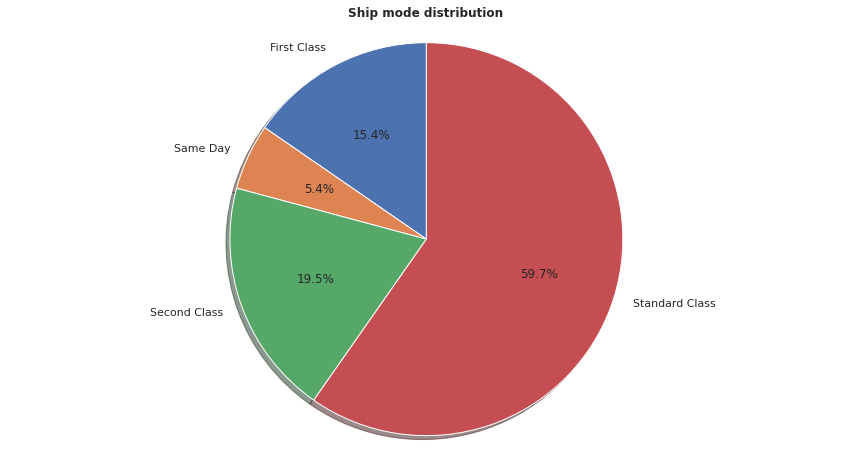

In [ ]:
#Plot

fig, ax = plt.subplots(figsize=(15, 8))
ax.pie(data_ship_mode.groupby(['Ship Mode'])['count'].sum(), labels = data_ship_mode['Ship Mode'].unique(), autopct='%1.1f%%',
        shadow=True, startangle=90 )
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title("Ship mode distribution", fontweight="bold")
plt.show()

[Text(0.5, 1.0, 'Mode Ship by profit_state')]

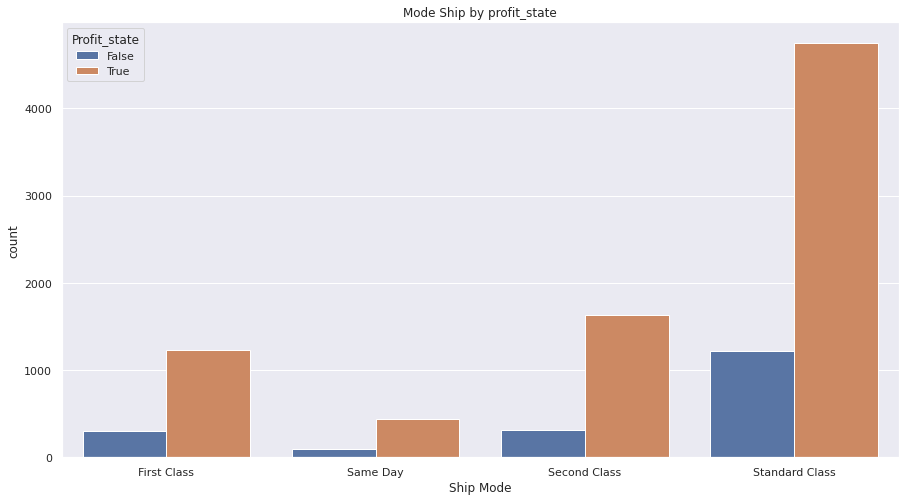

In [ ]:
#Plot
plt.figure(figsize = (15,8))
sns.barplot(x="Ship Mode", y="count", hue="Profit_state", data=data_ship_mode).set(title="Mode Ship by profit_state")

[Text(0.5, 1.0, 'Mode Ship by percentage of profit_state')]

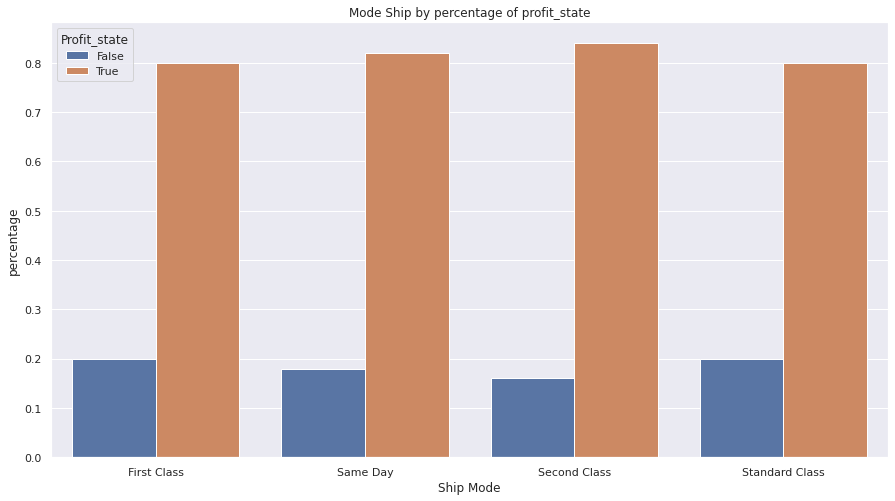

In [ ]:
#Plot
plt.figure(figsize = (15,8))
sns.barplot(x="Ship Mode", y="percentage", hue="Profit_state", data=data_ship_mode).set(title="Mode Ship by percentage of profit_state")

* No effect , for each mode of shipping , the count of the positif profit is the same 

###Profit by Segment

In [ ]:
data.head()

,index,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit_state
0,0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,True
1,1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,True
2,2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,True
3,3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,False
4,4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,True


In [ ]:
data['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [ ]:
data_segment = data.groupby(["Segment", "Profit_state"]).count()['index'].reset_index(name='count')

In [ ]:
#add a percentage of profit_state 

percentage = []
i = 0
while (i < 6): 
  percentage.append(round(data_segment.iloc[i,2]/(data_segment.iloc[i+1,2]+data_segment.iloc[i,2]),2))
  percentage.append(round(1-percentage[-1] ,2))
  i = i+2 
data_segment['percentage'] = percentage


In [ ]:
data_segment

,Segment,Profit_state,count,percentage
0,Consumer,False,1038,0.20
1,Consumer,True,4153,0.80
2,Corporate,False,573,0.19
3,Corporate,True,2447,0.81
4,Home Office,False,325,0.18
5,Home Office,True,1458,0.82


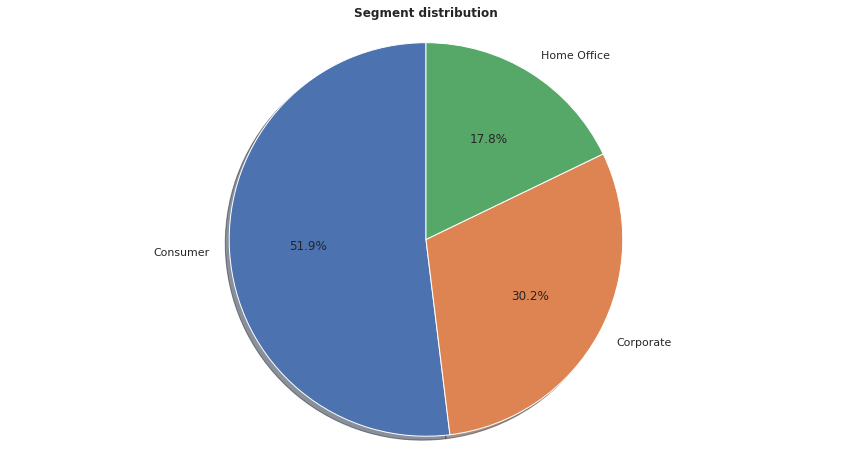

In [ ]:
#Segment distribution 

fig, ax = plt.subplots(figsize=(15, 8))
ax.pie(data_segment.groupby(['Segment'])['count'].sum(), labels = data_segment['Segment'].unique(), autopct='%1.1f%%',
        shadow=True, startangle=90 )
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title("Segment distribution", fontweight="bold")
plt.show()

[Text(0.5, 1.0, 'Segment type by profit_state')]

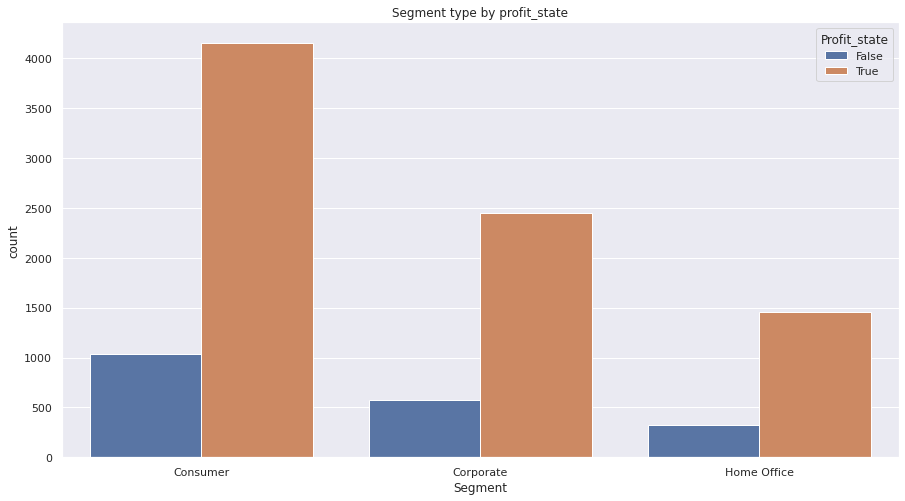

In [ ]:
#Segment by profit state
plt.figure(figsize = (15,8))
sns.barplot(x="Segment", y="count", hue="Profit_state", data = data_segment ).set(title="Segment type by profit_state")

[Text(0.5, 1.0, 'Segment type by percentage of profit_state')]

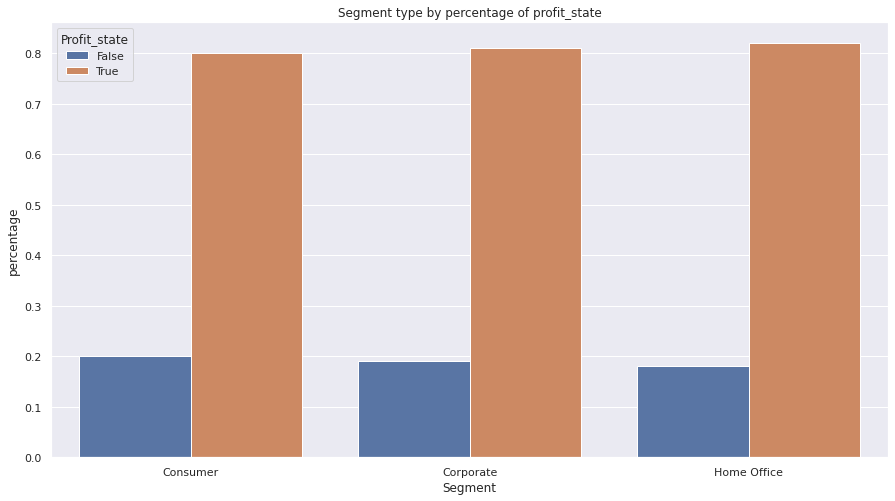

In [ ]:
#Segment by percentile of profit state
plt.figure(figsize = (15,8))
sns.barplot(x="Segment", y="percentage", hue="Profit_state", data=data_segment).set(title="Segment type by percentage of profit_state")

* No effect , for each segment , the count of the positif profit is the same  

In [ ]:
#Compare Sales vs Profit in each segment 
#data for profit percentaile
data_segment1 = data.groupby('Segment')['Profit'].sum().reset_index()
data_segment1['percent'] = data_segment1['Profit']/data_segment1['Profit'].sum()

#data for sales percentaile
data_segment2 = data.groupby('Segment')['Sales'].sum().reset_index()
data_segment2['percent'] = data_segment2['Sales']/data_segment2['Sales'].sum()

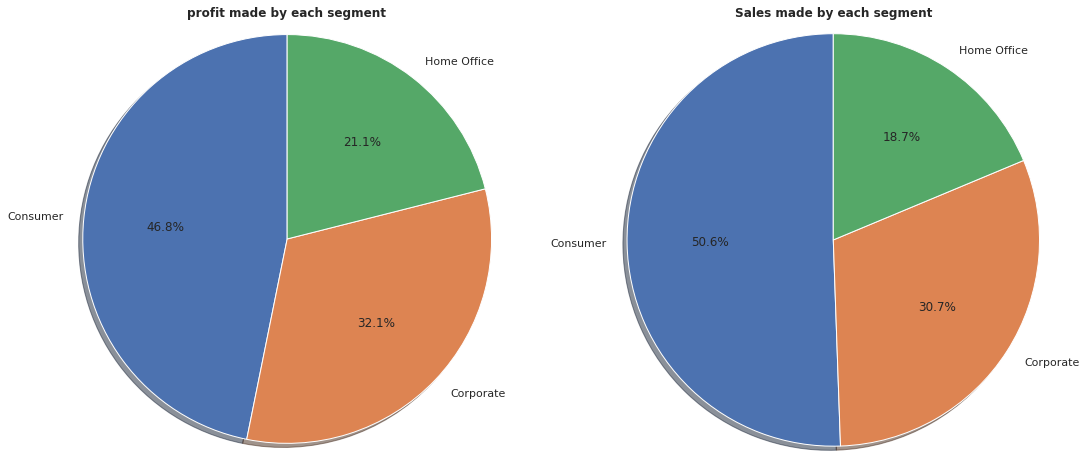

In [ ]:
#Plot
fig, ax = plt.subplots(1 ,2 ,figsize=(18, 8))
ax[0].pie(data_segment1['percent'], labels = data_segment1['Segment'].unique(), autopct='%1.1f%%',
        shadow=True, startangle=90 )
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[0].set_title("profit made by each segment", fontweight="bold")

ax[1].pie(data_segment2['percent'], labels = data_segment2['Segment'].unique(), autopct='%1.1f%%',
        shadow=True, startangle=90 )
ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[1].set_title("Sales made by each segment", fontweight="bold")

plt.show()


* Around 50% of the total sales were made in the consumer segment which comprises of the individual buyers.
* The Corporate sector and Home Office segments have around 31% and 19% sales respectively.
* While the Consumer segment had more than 50% in sales, its total contribution in the profits made by the company is only around 46%. This shows that the company is bearing a higher loss in the Consumer segment.
* The Corporate and the Home Office segments are returning more profits to the supermarket as compared to the sales made. While their joint sales is around 50%, thier joint profits made for the supermarket is around 54%.

###Profit by Region

In [ ]:
data.head()

,index,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit_state
0,0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,True
1,1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,True
2,2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,True
3,3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,False
4,4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,True


In [ ]:
data_region = data.groupby(["Region", "Profit_state"]).count()['index'].reset_index(name='count')

In [ ]:
data_region

,Region,Profit_state,count
0,Central,False,752
1,Central,True,1571
2,East,False,572
3,East,True,2276
4,South,False,272
5,South,True,1348
6,West,False,340
7,West,True,2863


In [ ]:
#add a percentage of profit_state 

percentage = []
i = 0
while (i < 8): 
  percentage.append(round(data_region.iloc[i,2]/(data_region.iloc[i+1,2]+data_region.iloc[i,2]),2))
  percentage.append(round(1-percentage[-1] ,2))
  i = i+2 
data_region['percentage'] = percentage
data_region

,Region,Profit_state,count,percentage
0,Central,False,752,0.32
1,Central,True,1571,0.68
2,East,False,572,0.20
3,East,True,2276,0.80
4,South,False,272,0.17
5,South,True,1348,0.83
6,West,False,340,0.11
7,West,True,2863,0.89


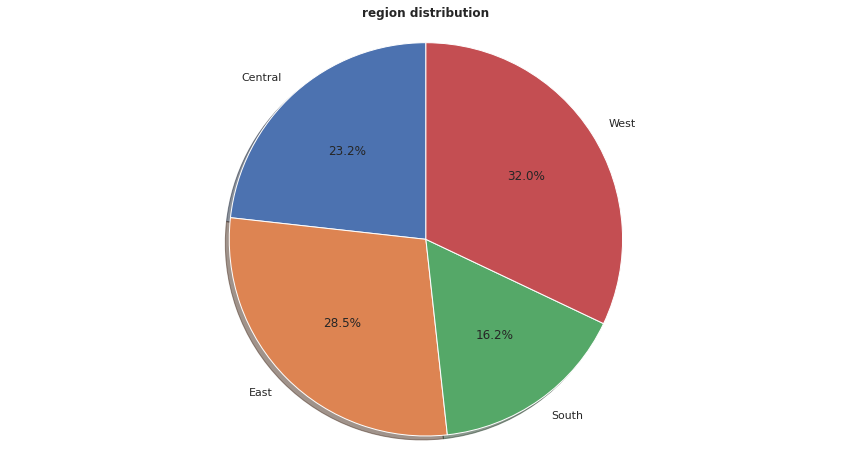

In [ ]:
#Plot
fig, ax = plt.subplots(figsize=(15, 8))
ax.pie(data_region.groupby(['Region'])['count'].sum(), labels = data_region['Region'].unique(), autopct='%1.1f%%',
        shadow=True, startangle=90 )
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title("region distribution", fontweight="bold")
plt.show()

[Text(0.5, 1.0, 'Region by percentage of profit_state')]

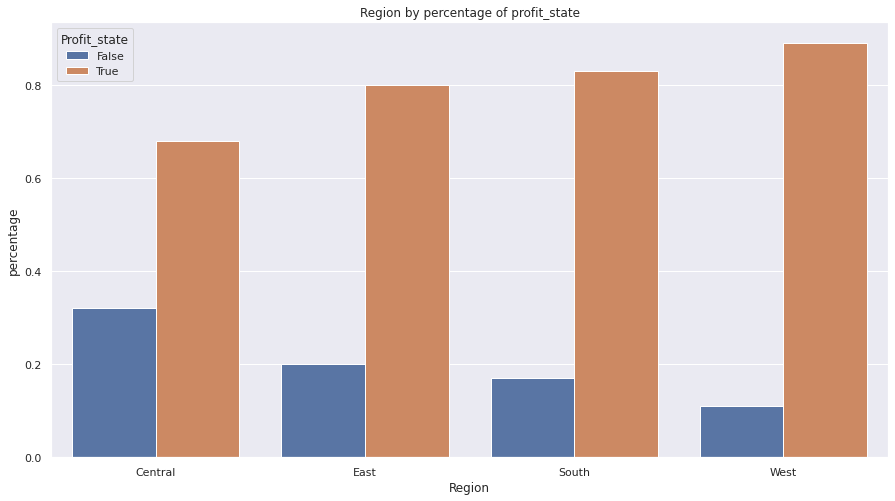

In [ ]:
#Region by percentile of profit state
plt.figure(figsize = (15,8))
sns.barplot(x="Region", y="percentage", hue="Profit_state", data=data_region).set(title="Region by percentage of profit_state")

* Impressive results , the amount of negatifs profit is around 32 % in central region

In [ ]:
#lets compare sales and profit in each region
#data for profit percentaile
data_region1 = data.groupby('Region')['Profit'].sum().reset_index()
data_region1['percent'] = data_region1['Profit']/data_region1['Profit'].sum()

#data for sales percentaile
data_region2 = data.groupby('Region')['Sales'].sum().reset_index()
data_region2['percent'] = data_region2['Sales']/data_region2['Sales'].sum()

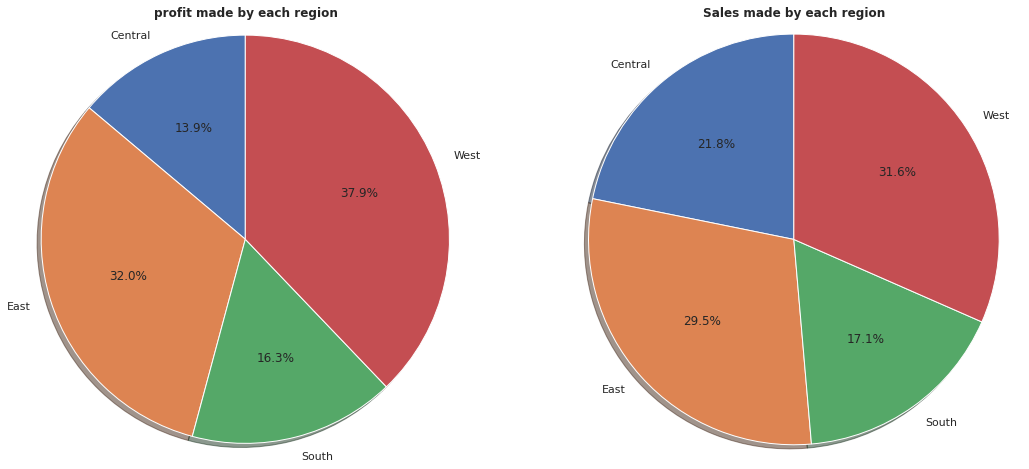

In [ ]:
#Plot
fig, ax = plt.subplots(1 ,2 ,figsize=(18, 8))
ax[0].pie(data_region1['percent'], labels = data_region1['Region'].unique(), autopct='%1.1f%%',
        shadow=True, startangle=90 )
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[0].set_title("profit made by each region", fontweight="bold")

ax[1].pie(data_region2['percent'], labels = data_region2['Region'].unique(), autopct='%1.1f%%',
        shadow=True, startangle=90 )
ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[1].set_title("Sales made by each region", fontweight="bold")

plt.show()


* Around 39 % of the total sales were made in the south/ central region
* Around 60 % of the total sales were made in the ,east/ west region
* While the south/ central had  39 % in sales, its total contribution in the profits made by the company is only around 30% . This shows that the company is bearing a higher loss in the south/ central region.
The East and the West regions are returning more profits to the supermarket as compared to the sales made. While their joint sales is around 60%, thier joint profits made for the supermarket is around 70 %.

In [ ]:
data.head()

,index,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit_state
0,0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,True
1,1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,True
2,2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,True
3,3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,False
4,4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,True
